# Automated Spotify Playlist Creation
### Author: Aditya Ranjan <br>
---
<br> <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc/4.0/80x15.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/">Creative Commons Attribution-NonCommercial 4.0 International License</a>.

## 1. The Idea
Always discovering new music on Spotify, I once came across am interesting website - <https://obscurifymusic.com> <br><br>
This website not only allowed me to see my top artists and songs, but also showed me how danceable and energetic my music was. This sparked my curiosity and I wondered whether it would be possible to create a playlist with the 25 most danceable songs from my library.<br><br>
Soon enough, I thought that instead of manually creating playlists and adding songs (which would have been mind-numbingly boring) and calculating their several features (which are not directly visible on Spotify), I could just write some code for it.<br>
### Essential Libraries

In [ ]:
#Import essential libraries
import spotipy
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

- Spotipy is a Python library for the Spotify Web API. This library is what I use for accessing my songs, their features, and creating the playlists. <https://spotipy.readthedocs.io/en/2.13.0/>
- Pandas is an extremely useful tool for reading table data and can also be used for tasks such as data analysis.
- I use tqdm to show the progress for certain loops/processes.
- Matplotlib allows me to visualize the distribution of features such as danceability, energy, etc.

### Authentication Information

In [ ]:
#Variables to store authentication information    
userid = "Your User ID"
username = "Your Username"
scope = "user-library-read playlist-modify-private playlist-read-private playlist-modify-public"
clientID = "Your Client ID"
clientSecret = "Your Client Secret"
redirectURL = "http://google.com/"

- How to get your User ID -> Click on your Spotify profile -> Click on the three dots -> Click on Share -> Click on Copy Profile Link -> Your User ID is at the end of the code you copied.
- Your Username is what you use to log into Spotify.
- You can use different scopes based on your needs -<https://developer.spotify.com/documentation/general/guides/scopes/>
- <https://developer.spotify.com/dashboard/login> Visit this link and after creating an app, you can see your Client ID and Client Secret. This is sensitive information, so be careful with it!
- You can use a different redirect url if you wish to, but <http://google.com> works just fine.

### Authentication

In [ ]:
#Authentication code
token = spotipy.util.prompt_for_user_token(userid, scope, clientID, clientSecret, redirectURL)
sp = spotipy.Spotify(auth = token)

I cleared the output for the above cell, but after running this code, it will redirect you to a page where you have to click Agree to access your music, and then it will redirect you to your redirect url with a code at the end of the url. Copy the entire URL and paste it here where it will ask you to. After this, you can proceed ahead with your code.

### Accessing My Music

In [ ]:
#Function to get ids of all my liked songs
def getAllIDs():
    results = sp.current_user_saved_tracks() #all of my liked songs
    ids = [item["track"]["id"] for item in results["items"]]

    #Scrolls through the paginated results (gets all of my liked songs, not just the first 100)
    while results["next"]:
        results = sp.next(results)
        ids.extend(item["track"]["id"] for item in results["items"])

    return ids

The above function extracts the unique ids for all of my liked songs.

In [ ]:
#Function to extract features from a list of track ids and create a Pandas DataFrame out of them
def getTracksDF(ids):
    tracksDict = {"ID": [], "Name": [], "Artist": [], "Album": [], "Release Year": [], "Duration (sec)": [],
                  "Danceability": [], "Acousticness": [], "Energy": [], "Instrumentalness": [], "Liveness": [],
                  "Loudness": [], "Speechiness": [], "Valence": []}

    for currID in tqdm(ids):
        info, features, trackDict = sp.track(currID), sp.audio_features(currID)[0], {}
        tracksDict["ID"].append(currID)
        
        tracksDict["Name"].append(info["name"])
        tracksDict["Artist"].append(info["album"]["artists"][0]["name"])
        tracksDict["Album"].append(info["album"]["name"])
        tracksDict["Release Year"].append(int(info["album"]["release_date"][0 : 4]))

        tracksDict["Duration (sec)"].append(features["duration_ms"] / 1000)
        tracksDict["Danceability"].append(features["danceability"])
        tracksDict["Acousticness"].append(features["acousticness"])
        tracksDict["Energy"].append(features["energy"])
        tracksDict["Instrumentalness"].append(features["instrumentalness"])
        tracksDict["Liveness"].append(features["liveness"])
        tracksDict["Loudness"].append(features["loudness"])
        tracksDict["Speechiness"].append(features["speechiness"])
        tracksDict["Valence"].append(features["valence"])
        
    allTracks = pd.DataFrame(tracksDict)

    return allTracks

The above function takes a list of song ids (all of my liked songs in this case) and creates a Pandas DataFrame with all of their features and attributes.

In [ ]:
#Returns a DataFrame of all my liked songs and their features
allTracks = getTracksDF(getAllIDs())

Now I have all of my liked songs and their individual features in one DataFrame, which I can convert to a CSV file for future use.

In [ ]:
#Converts the allTracks DataFrame to a CSV file
allTracks.to_csv("AdiSpotifyLibrary.csv", index = False)

In [ ]:
#Moves the CSV file to my data folder
mv ~/AdiJupyterNotebook/AdiSpotifyLibrary.csv ~/AdiJupyterNotebook/AdiJupyterData/AdiSpotifyLibrary.csv

With a CSV of all of my liked songs and their features created, I can now read from that CSV file to analyze some features and create playlists!

### Basic Visualization

In [5]:
#Opens the CSV file and stores it in a Pandas DataFrame
allTracks = pd.read_csv("AdiJupyterData/AdiSpotifyLibrary.csv")
allTracks.head() #first 5 rows of the DataFrame

,ID,Name,Artist,Album,Release Year,Duration (sec),Danceability,Acousticness,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Valence
0,2p37Mfy2PWajgOS3i2aaep,"U Say (feat. Tyler, The Creator & Jay Prince)",GoldLink,Diaspora,2019,201.240,0.926,0.0471,0.680,0.000125,0.119,-7.689,0.1960,0.458
1,653ZIDwdxZnjFAGLsupKhp,Tera hoon ne laga hoon,Marana,Tera hone laga hoon,2020,298.934,0.686,0.5660,0.768,0.000000,0.132,-5.630,0.0313,0.539
2,52itZ0w0CydihB2JCZEIft,Pee Loon,Pritam,Once Upon A Time In Mumbaai,2010,285.687,0.656,0.2770,0.722,0.000138,0.187,-5.064,0.0364,0.883
3,7d0cwWnuNYEt4foaS2XdwW,Pacific Coast Highway,David Carbonara,Mad Men: On the Rocks (Music from the Televisi...,2013,94.120,0.607,0.7380,0.363,0.933000,0.118,-13.587,0.0274,0.743
4,6CSLNGruNhqpb5zhfs5n3i,Celebration - Single Version,Kool & The Gang,Celebration / Morning Star,2009,215.653,0.843,0.0466,0.656,0.018700,0.169,-11.184,0.0595,0.931


In [ ]:
#List of all my tracks' ids
ids = list(allTracks["ID"])

With all of the ids in a list, I can now move on to some basic visualization. I will only be plotting histograms for a few numerical features right now as my current goal is to generate feature based playlists. In the future, I plan to perform some more in-depth analysis where the goal will be to analyze relationships between different variables, not just create feature based playlists.

### Distributions of Numerical Features

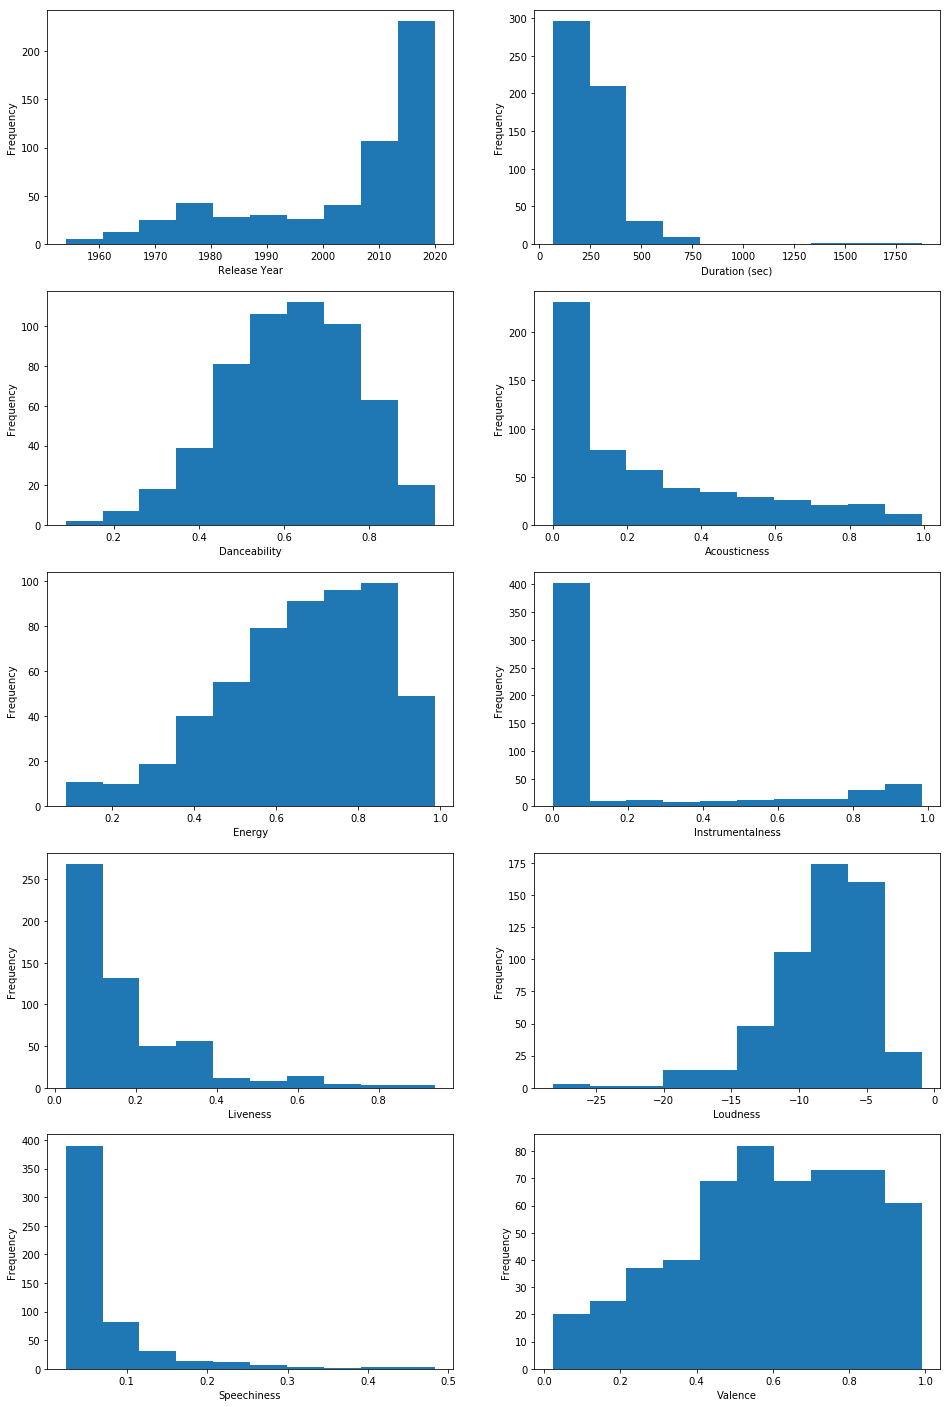

In [17]:
#List of features to plot
keysToPlot, keyNum = list(allTracks.columns[4:]), 0

#Figure size
plt.rcParams["figure.figsize"] = (16, 25)

#Plots a histogram of each feature in keysToPlot
for i in range(5):
    for j in range(2):
        plt.subplot2grid((5, 2), (i, j))
        plt.xlabel(keysToPlot[keyNum])
        plt.ylabel("Frequency")
        plt.hist(allTracks[keysToPlot[keyNum]])
        keyNum += 1
        
plt.show()

I can now move on to creating playlists based on all of the above features except the Release Year and Duration (sec).

### Playlist Creation

In [ ]:
#Function to get the id of any playlist given its name
def getPlaylistID(playlistName):
    playlists = sp.user_playlists(username)
    for playlist in playlists["items"]:
        if playlist["name"] == playlistName:
            return playlist["id"]

The above function gets the id of a playlist given the playlist name. This helps with adding songs to any playlist as the playlist id is needed.

In [ ]:
#Function to create 2 playlists - description of both playlists given below this cell
def createPlaylists(playlistNames, playlistLength, feature):
    sp.user_playlist_create(username, playlistNames[0], public = True)
    sp.user_playlist_create(username, playlistNames[1], public = True)
    
    vals = list(allTracks[feature])
    sortedVals = list(set(vals))
    sortedVals.sort()
    
    lowest, highest = [], []
    for i in range(playlistLength):
        lowest.append(ids[vals.index(sortedVals[i])])
        highest.append(ids[vals.index(sortedVals[len(sortedVals) - 1 - i])])
        
    sp.user_playlist_add_tracks(username, getPlaylistID(playlistNames[0]), lowest)
    sp.user_playlist_add_tracks(username, getPlaylistID(playlistNames[1]), highest)

#### What exactly is the above function doing?
For each feature, let's say danceability, the above function creates two playlists:
1. N songs with the most/highest of that feature (for example, the N most danceable songs)
2. N songs with the least/lowest of that feature (for example, the N least danceable songs)

N is the desired playlist length. In this case, N is 25 as that is what I set to be the playlist length (seen below).

In [20]:
#Creates 16 playlists for 8 features - 2 playlists for both the lower end and higher end of a feture
playlistNames = [["25 Least Danceable Songs", "25 Most Danceable Songs"],
                 ["25 Least Acoustic Songs", "25 Most Acoustic Songs"],
                 ["25 Least Energetic Songs", "25 Most Energetic Songs"],
                 ["25 Least Instrumental Songs", "25 Most Instrumental Songs"],
                 ["25 Least Live Songs", "25 Most Live Songs"],
                 ["25 Quietest Songs", "25 Loudest Songs"],
                 ["25 Least Speechy Songs", "25 Most Speechy Songs"],
                 ["25 Least Positive Songs", "25 Most Positive Songs"]]

playlistFeatures = ["Danceability", "Acousticness", "Energy", "Instrumentalness",
                    "Liveness", "Loudness", "Speechiness", "Valence"]

for i in tqdm(range(len(playlistNames))):
    createPlaylists(playlistNames[i], 25, playlistFeatures[i])

100%|██████████| 8/8 [00:06<00:00,  1.24it/s]


I now have all of my playlists created! I didn't have to laboriously calculate any features, create the playlists, or add songs one at at time. All I had to do was write some code!

## Check the CSV out!
https://drive.google.com/file/d/1joW2FxmVY-DIUKScM0vA-x85sfpXln2z/view?usp=sharing


## Check the Playlists out!

**Danceability:**<br>
25 Least Danceable Songs - https://open.spotify.com/playlist/3bExcHhJVKYv9wVi2HYl7i?si=OctrG0JLQzWDwnrNHMsh3w<br>
25 Most Danceable Songs - https://open.spotify.com/playlist/56jr6lwIGfwV0B4Avl2qHJ?si=CwnR5JZFTfex3GW53tjkMQ

**Acousticness:**<br>
25 Least Acoustic Songs - https://open.spotify.com/playlist/3PyJGxbuRvQQ2swBLW2x1Q?si=YhE1kvCCTmWnjSjeJRiZwg<br>
25 Most Acoustic Songs - https://open.spotify.com/playlist/4bwienw9o4SbFAOYCbaOxG?si=nOffCGKNS-i3eZW9V2YrfQ

**Energy:**<br>
25 Least Energetic Songs - https://open.spotify.com/playlist/3d7g3KPgwEC3BkHap7J2ZB?si=dwUMuez9R4yJk8UazCaH_g<br>
25 Most Energetic Songs - https://open.spotify.com/playlist/0oHuR7I6rH5arERfIL9Det?si=HDQ48a3dT0av5sxNa8mK-g

**Instrumentalness:**<br>
25 Least Instrumental Songs - https://open.spotify.com/playlist/7jaWtfzqu9vvyUm8PPGXZo?si=sBCDRoSORsiFZzl99niw1Q<br>
25 Most Instrumental Songs - https://open.spotify.com/playlist/5yL877k4GFrv9TxQa4zZc3?si=3L0tliFeQEqrPZiFONQPOA

**Liveness:**<br>
25 Least Live Songs - https://open.spotify.com/playlist/0SXdrrVBQsHy2xpRHZbowd?si=VXswVupMQvuiYys2I-IfMw<br>
25 Most Live Songs - https://open.spotify.com/playlist/7Aa30vE1JkEA42SjaaJj9l?si=9VT0F-HyTg6AMXE_33Eepw

**Loudness:**<br>
25 Quietest Songs - https://open.spotify.com/playlist/2w8nL6SmnLv9eL4eCbDaE6?si=1PZSewUTS8aqlA8VF7SPsQ<br>
25 Loudest Songs -https://open.spotify.com/playlist/6eV6OUZI2kQ2GfxZAq1Jvk?si=Lk0IXJTCTQ2k-XYs_tt7yA

**Speechiness:**<br>
25 Least Speechy Songs - https://open.spotify.com/playlist/3X6G9SsD0gRPNludAZtWCC?si=hL5dzcNtRrmDo5SWN2FuuA<br>
25 Most Speechy Songs - https://open.spotify.com/playlist/5lZPfXg0MEN1cvcSnp0ut8?si=_M5gVULPSn2u6JRnyydkvg

**Valence:**<br>
25 Least Positive Songs - https://open.spotify.com/playlist/4OsxpMcCiiE21X1Eb1ZVIk?si=QYhm7R9cSf-q3gjECfpQqA<br>
25 Most Positive Songs - https://open.spotify.com/playlist/4XuQRfo2NtruelOHfgIdz8?si=mtIgMRnqT9av81IFFf-QDQ

### Note
All of these playlists were generated using songs from my personal library.

## What Next?
I plan to do some more in-depth analysis in the future, like studying the relationship between different variables/features and maybe even doing some text analysis to determine the languages of the songs or the emotions/sentiments associated with them.

I could also use the results from this analysis to automate the creation of other playlists based on different criteria or even follow my 50 favorite artists. There's a multitude of paths to choose from!